In [1]:
import numpy as np
import networkx as nx
import scipy.linalg as la
import matplotlib.pyplot as plt
import nb_general as nb
import statsmodels.api as sm

In [2]:
class KemenyConstant:
    """
    Tools to compute and compare kemeny constant
    """
    def __init__(self, G):
        """
        Attributes:
            G (networkx Graph) - graph
            A (ndarray) - adjacency matrix
            D (ndarray) - degree matrix
            P (ndarray) - transition matrix
            C (ndarray) - edge matrix
            D_tilde (ndarray) - edge degree matrix
            P_tilde (ndarray) - edge transition matrix
            B (ndarray) - NB matrix
            D_hat (ndarray) - NB degree matrix
            P_hat (ndarray) - NB transition matrix
        """
        self.G = G
        self.n = len(G.nodes())
        self.m = len(G.edges())
        
        # Standard Kemeny constant matrices
        self.A = nx.adjacency_matrix(G).todense()
        self.D = np.diag(np.array(self.A.sum(axis=1)).T[0])
        D_inv = la.solve(self.D, np.eye(self.D.shape[0]))
        self.P = D_inv@self.A
        
        # Edge Kemeny constant matrices
        self.C, self.B = nb.to_edge_space(G,B=True,graph=False)
        self.D_tilde = np.diag(self.C.sum(axis=1))
        D_tilde_inv = la.solve(self.D_tilde,np.eye(self.D_tilde.shape[0]))
        self.P_tilde = D_tilde_inv@self.C
        
        # NB Kemeny constant matrices
        self.D_hat = np.diag(self.B.sum(axis=1))
        D_hat_inv = la.solve(self.D_hat,np.eye(self.D_hat.shape[0]))
        self.P_hat = D_hat_inv@self.B
        
    def kemeny(self):
        """
        Compute simple kemeny constant
        """
        vals = la.eigvals(self.P)
        k = 0
        for v in vals:
            if np.round(v,5) != 1:
                k += 1/(1-v)
        return k
    
    def edge_kemeny(self):
        """
        Compute edge kemeny
        """
        vals = la.eigvals(self.P_tilde)
        k = 0
        for v in vals:
            if np.round(v,5) != 1:
                k += 1/(1-v)
        return k
    
    def nb_kemeny(self):
        """
        Compute NB kemeny
        """
        vals = la.eigvals(self.P_hat)
        k = 0
        for v in vals:
            if np.round(v,5) != 1:
                k += 1/(1-v)
        return k
        

In [3]:
G = nx.cycle_graph(4)

In [4]:
A = nx.adjacency_matrix(G).todense()

In [5]:
np.diag(np.array(A.sum(axis=1)).T[0])

array([[2, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 2]], dtype=int64)

In [6]:
M = np.array([[3,2,2,2],[2,3,2,2],[2,2,3,2],[2,2,2,3]])

In [7]:
D = np.diag(list(dict(G.degree()).values()))

In [8]:
pi = la.eig(la.inv(D)@A)[1][:,2]

In [9]:
M@pi

array([4.5, 4.5, 4.5, 4.5])

# Example 2

In [67]:
A = np.array([[0,1,1,0],[1,0,1,1],[1,1,0,1],[0,1,1,0]])
G = nx.Graph(A)
D = np.diag(list(dict(G.degree()).values()))
P = la.inv(D)@A

In [68]:
M = np.array([[5,7/4,7/4,10/3],[3,10/3,5/3,3],[3,5/3,10/3,3],[10/3,7/4,7/4,5]])

In [69]:
pi = la.eig(P)[1][:,2]

In [70]:
(M@pi)

array([-3.53009043, -1.56892908, -1.56892908, -3.53009043])

In [71]:
ex_2 = nb.NBEigVals(G)

In [72]:
P_tilde = la.inv(np.diag(ex_2.B.sum(axis=1)))@ex_2.B

In [73]:
pvals, pvecs = la.eig(P_tilde)

In [74]:
pvals

array([-7.07106781e-01+0.j        , -2.94877256e-01+0.87227163j,
       -2.94877256e-01-0.87227163j, -5.00000000e-01+0.5j       ,
       -5.00000000e-01-0.5j       , -1.38777878e-17+0.70710678j,
       -1.38777878e-17-0.70710678j,  1.00000000e+00+0.j        ,
        7.07106781e-01+0.j        ,  5.89754512e-01+0.j        ])

In [75]:
pi = ex_2.T@pvecs[:,-3]

In [76]:
M@pi

array([-8.59085431+0.j, -8.53814968+0.j, -8.53814968+0.j, -8.59085431+0.j])

# Bipartite Biregular

In [77]:
G = nx.Graph([[1,4],[1,5],[2,4],[2,5],[3,4],[3,5]])

In [78]:
bipartite = nb.NBEigVals(G)

In [79]:
B = bipartite.B

In [80]:
P = la.inv(np.diag(B.sum(axis=1)))@B

In [81]:
la.eigvals(P)

array([-1.00000000e+00+0.j        , -5.55111512e-17+1.j        ,
       -5.55111512e-17-1.j        , -2.22044605e-16+0.70710678j,
       -2.22044605e-16-0.70710678j,  1.00000000e+00+0.j        ,
       -7.07106781e-01+0.j        , -7.07106781e-01+0.j        ,
        7.07106781e-01+0.j        ,  5.55111512e-17+0.70710678j,
        5.55111512e-17-0.70710678j,  7.07106781e-01+0.j        ])

In [82]:
k = 0
for val in la.eigvals(np.eye(P.shape[0])-P):
    if np.round(val,5) != 0:
        k += 1/val

In [83]:
k

(12.166666666666666+0j)

In [84]:
bi_2 = nb.NBEigVals(nx.Graph([[1,4],[1,5],[2,4],[2,5],[3,4],[3,5],[6,4],[6,5]]))

In [85]:
B = bi_2.B
P = la.inv(np.diag(B.sum(axis=1)))@B

In [86]:
la.eigvals(P)

array([-1.00000000e+00+0.j        ,  1.66533454e-16+1.j        ,
        1.66533454e-16-1.j        , -5.77350269e-01+0.j        ,
       -1.38777878e-17+0.57735027j, -1.38777878e-17-0.57735027j,
        1.00000000e+00+0.j        ,  2.63677968e-16+0.57735027j,
        2.63677968e-16-0.57735027j, -5.77350269e-01+0.j        ,
       -5.77350269e-01+0.j        ,  5.77350269e-01+0.j        ,
        2.42861287e-16+0.57735027j,  2.42861287e-16-0.57735027j,
        5.77350269e-01+0.j        ,  5.77350269e-01+0.j        ])

In [87]:
k = 0
for val in la.eigvals(np.eye(P.shape[0])-P):
    if np.round(val,5) != 0:
        k += 1/val

In [88]:
k

(14.999999999999993+0j)

In [89]:
C = bi_2.C
PC = la.inv(np.diag(C.sum(axis=1)))@C
kc = 0
for val in la.eigvals(np.eye(PC.shape[0])-PC):
    if np.round(val,5) != 0:
        kc += 1/val

In [90]:
kc

(14.500000000000002+0j)

In [91]:
A = bi_2.A
PA = la.inv(bi_2.D)@A
ka = 0
for val in la.eigvals(np.eye(PA.shape[0])-PA):
    if np.round(val,5) != 0:
        ka += 1/val

In [92]:
ka

(4.5+0j)

In [93]:
ka+2*bi_2.m-bi_2.n

(14.5+0j)

## Example of $Kv\neq Ke+2m-n$

In [94]:
G = nx.geometric.random_geometric_graph(20,.3)

In [95]:
ex_1 = nb.NBEigVals(G)

In [96]:
P = la.inv(ex_1.D)@ex_1.A

In [97]:
kv1 = 0
for val in la.eigvals(P):
    if val != 1:
        kv1 += 1/(1-val)

In [98]:
kv1

(-2661217961627985.5+0j)

In [99]:
D_hat_inv = la.inv(np.diag(ex_1.C.sum(axis=1)))

In [100]:
CP1 = D_hat_inv@ex_1.C

In [101]:
ke1 = 0
for val in la.eigvals(CP1):
    if val != 1:
        ke1 += 1/(1-val)

In [102]:
np.allclose(kv1+2*ex_1.m-ex_1.n,ke1)

False

## Examples

In [103]:
ex_2 = nb.NBEigVals(nx.complete_graph(20))

In [104]:
P2 = la.inv(np.diag(ex_2.C.sum(axis=1)))@ex_2.C

In [105]:
ke2 = 0
for val in la.eigvals(P2):
    if val != 1:
        ke2 += 1/(1-val)

In [106]:
Phat2 = la.inv(np.diag(ex_2.B.sum(axis=1)))@ex_2.C

In [107]:
kb2 = 0
for val in la.eigvals(Phat2):
    if val != 1:
        kb2 += 1/(1-val)

In [108]:
kb2

(359.9999999999998+0j)

In [109]:
ke2

(-375299968947163.5+0j)

### Compare

In [ ]:
[nx.draw(i) for i in list(nx.connected_component_subgraphs(G))]

In [ ]:
list(nx.connected_component_subgraphs(G))

In [ ]:
np.diag(A.sum(axis=1)

In [55]:
ex = nb.NBEigVals(g)

In [167]:
examples = []
for j in range(65,190):
    g = nx.gnm_random_graph(20,j)
    examples.append(KemenyConstant(g))

In [168]:
m = []
edge_k = []
nb_k = []
for i in range(len(examples)):
    m.append(examples[i].m)
    edge_k.append(examples[i].edge_kemeny())
    nb_k.append(examples[i].nb_kemeny())

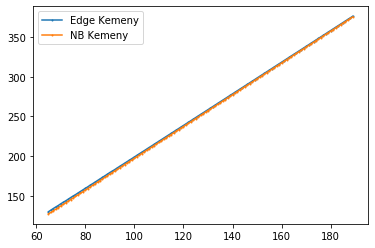

In [176]:
plt.plot(m,edge_k,'-o',label='Edge Kemeny',markersize=1)
plt.plot(m,nb_k,'-o',label='NB Kemeny',markersize=1)
plt.legend()
plt.title('')
plt.show()

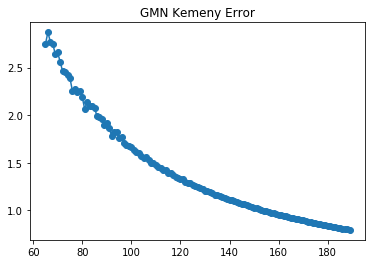

In [242]:
plt.plot(m,np.array(edge_k)-np.array(nb_k),'-o')
plt.title('GMN Kemeny Error')
plt.savefig('gmn_kemeny_error.pdf')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


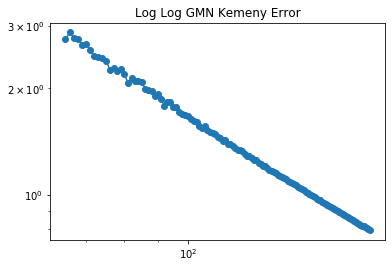

In [243]:
plt.loglog(m,np.array(edge_k)-np.array(nb_k),'-o')
plt.title('Log Log GMN Kemeny Error')
plt.savefig('gmn_kemeny_log_error.pdf')
plt.show()

### Compare with random geometric

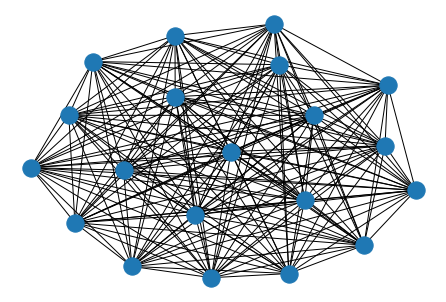

In [204]:
nx.draw(nx.random_geometric_graph(20,3))

In [225]:
rad = np.linspace(.4,1,100)
geo_examples = []
for r in rad:
    try:
        g = nx.random_geometric_graph(20,r)
        geo_examples.append(KemenyConstant(g))
    except:
        continue

In [227]:
geo_m = []
geo_edge_k = []
geo_nb_k = []
for j in range(len(geo_examples)):
    geo_m.append(geo_examples[j].m)
    geo_edge_k.append(geo_examples[j].edge_kemeny())
    geo_nb_k.append(geo_examples[j].nb_kemeny())

In [230]:
idx = np.argsort(np.array(geo_m))

In [232]:
geo_m = np.array(geo_m)[idx]
geo_edge_k = np.array(geo_edge_k)[idx]
geo_nb_k = np.array(geo_nb_k)[idx]

In [237]:
uni, new_idx = np.unique(geo_m,return_index=True)

In [238]:
geo_m = geo_m[new_idx]
geo_edge_k = geo_edge_k[new_idx]
geo_nb_k = geo_nb_k[new_idx]

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


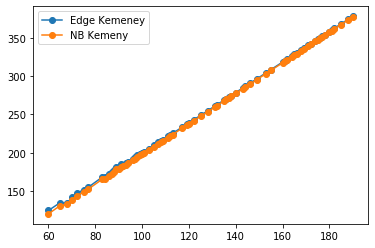

In [239]:
plt.plot(geo_m,geo_edge_k,'-o',label='Edge Kemeney')
plt.plot(geo_m,geo_nb_k,'-o',label='NB Kemeny')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


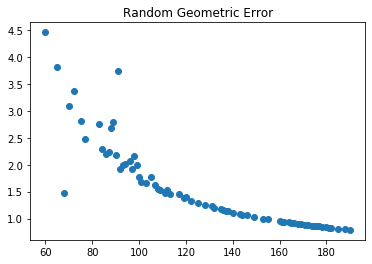

In [244]:
plt.plot(geo_m,geo_edge_k-geo_nb_k,'o')
plt.title('Random Geometric Error')
plt.savefig('random_geometric_kemeny_error.pdf')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


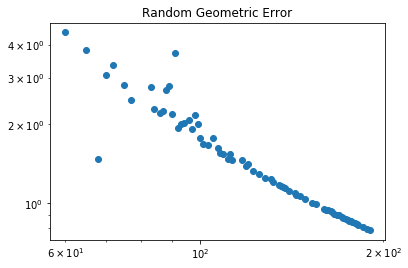

In [245]:
plt.loglog(geo_m,geo_edge_k-geo_nb_k,'o')
plt.title('Random Geometric Error')
plt.savefig('random_geometric_kemeny_log_error.pdf')
plt.show()

### Fit errors

In [265]:
X = np.zeros((125,2))
X[:,0] = np.zeros(125)
X[:,1] = np.log(m)
y = np.log(np.array(edge_k)-np.array(nb_k))

In [266]:
gmn_model = sm.OLS(y,X).fit()
gmn_model.params

array([0.        +0.j, 0.05333293+0.j])

In [267]:
geo_X = np.zeros((len(geo_m),2))
geo_X[:,0] = np.zeros(len(geo_m))
geo_X[:,1] = np.log(geo_m)
geo_y = np.log(geo_edge_k-geo_nb_k)

In [268]:
geo_model = sm.OLS(geo_y,geo_X).fit()
geo_model.params

array([0.        +0.j, 0.06607501+0.j])

# Comparing $P$ and $\tilde{P}$

In [273]:
np.sort(np.round(la.eigvals(examples[0].P),5))

array([-0.5977 +0.j, -0.48128+0.j, -0.43246+0.j, -0.37418+0.j,
       -0.31614+0.j, -0.28441+0.j, -0.25505+0.j, -0.16829+0.j,
       -0.11258+0.j, -0.07206+0.j, -0.01801+0.j,  0.02172+0.j,
        0.07283+0.j,  0.19051+0.j,  0.22646+0.j,  0.29733+0.j,
        0.39607+0.j,  0.42059+0.j,  0.48665+0.j,  1.     +0.j])

In [274]:
np.sort(np.round(la.eigvals(examples[0].P_tilde),5)[:20])

array([-0.5977 +0.j, -0.48128+0.j, -0.43246+0.j, -0.37418+0.j,
       -0.31614+0.j, -0.28441+0.j, -0.25505+0.j, -0.16829+0.j,
       -0.11258+0.j, -0.07206+0.j, -0.01801+0.j,  0.02172+0.j,
        0.07283+0.j,  0.19051+0.j,  0.22646+0.j,  0.29733+0.j,
        0.39607+0.j,  0.42059+0.j,  0.48665+0.j,  1.     +0.j])

In [276]:
examples[0].kemeny()+2*examples[0].m-examples[0].n

(130.11349594922117+0j)

In [278]:
examples[0].edge_kemeny()

(130.1134959492212+0j)

In [282]:
eig1 = nb.NBEigVals(examples[0].G)

In [285]:
eig1.T.T@eig1.T

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [295]:
(eig1.S.T@eig1.tau@eig1.T.T).shape

(20, 20)

In [293]:
eig1.T.T@eig1.T@eig1.A

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 20 is different from 130)

In [296]:
vals, vecs = la.eig(examples[0].P)
vals_tilde, vecs_tilde = la.eig(examples[0].P_tilde)

In [297]:
vals

array([ 1.        +0.j,  0.48664766+0.j,  0.42058951+0.j,  0.39606745+0.j,
       -0.59770413+0.j,  0.29733014+0.j,  0.22646328+0.j,  0.19051037+0.j,
       -0.48127664+0.j, -0.43245996+0.j, -0.37417695+0.j, -0.3161373 +0.j,
       -0.28440888+0.j, -0.25505466+0.j, -0.16829219+0.j,  0.07283442+0.j,
       -0.11258455+0.j, -0.07206425+0.j,  0.02172212+0.j, -0.01800544+0.j])

In [300]:
np.round(vals_tilde,10)

array([ 1.        +0.j, -0.59770413+0.j,  0.48664766+0.j, -0.48127664+0.j,
       -0.43245996+0.j,  0.42058951+0.j,  0.39606745+0.j, -0.37417695+0.j,
        0.29733014+0.j, -0.3161373 +0.j,  0.22646328+0.j,  0.19051037+0.j,
       -0.28440888+0.j, -0.25505466+0.j, -0.16829219+0.j, -0.11258455+0.j,
       -0.07206425+0.j,  0.07283442+0.j,  0.02172212+0.j, -0.01800544+0.j,
       -0.        +0.j, -0.        -0.j,  0.        +0.j,  0.        -0.j,
       -0.        +0.j,  0.        +0.j, -0.        +0.j, -0.        -0.j,
        0.        +0.j,  0.        -0.j,  0.        +0.j, -0.        +0.j,
       -0.        -0.j,  0.        +0.j,  0.        +0.j,  0.        -0.j,
        0.        +0.j,  0.        -0.j,  0.        +0.j,  0.        -0.j,
        0.        +0.j,  0.        -0.j, -0.        +0.j, -0.        -0.j,
       -0.        +0.j, -0.        -0.j, -0.        +0.j, -0.        -0.j,
       -0.        +0.j, -0.        -0.j,  0.        +0.j,  0.        +0.j,
        0.        -0.j, -

In [314]:
np.block([eig1.S,eig1.T.T])@vecs[:,1]

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 20 is different from 40)

In [10]:
vecs_tilde[:,2]

NameError: name 'vecs_tilde' is not defined

In [11]:
G = nx.Graph([[1,5],[2,5],[3,5],[4,5],[1,6],[2,6],[3,6],[4,6]])

In [12]:
bi1 = KemenyConstant(G)

In [13]:
la.eigvals(bi1.P_tilde)

array([ 1.00000000e+00+0.00000000e+00j, -1.00000000e+00+0.00000000e+00j,
       -6.09608800e-09+0.00000000e+00j,  6.09608775e-09+0.00000000e+00j,
        5.17478081e-18+2.90698647e-09j,  5.17478081e-18-2.90698647e-09j,
       -3.54184010e-09+0.00000000e+00j, -2.05103184e-09+0.00000000e+00j,
       -4.13720005e-17+4.63289735e-17j, -4.13720005e-17-4.63289735e-17j,
        3.54184034e-09+0.00000000e+00j,  2.05103102e-09+0.00000000e+00j,
       -4.79243853e-17+1.45792134e-16j, -4.79243853e-17-1.45792134e-16j,
        1.48484204e-16+0.00000000e+00j,  4.76344266e-17+0.00000000e+00j])

In [14]:
la.eigvals(bi1.P)

array([-1.00000000e+00+0.j,  1.31622144e-16+0.j,  1.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j])

In [15]:
la.eigvals(bi1.A)

array([-2.82842712e+00+0.j,  2.70183181e-16+0.j,  2.82842712e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j])

In [17]:
g1 = KemenyConstant(nx.complete_bipartite_graph(2,3))
g2 = KemenyConstant(nx.complete_bipartite_graph(3,5))
g3 = KemenyConstant(nx.complete_bipartite_graph(4,9))
g4 = KemenyConstant(nx.complete_bipartite_graph(4,5))
g5 = KemenyConstant(nx.complete_bipartite_graph(5,12))

In [24]:
la.null_space(g1.P)

array([[-5.00000000e-01, -5.00000000e-01,  0.00000000e+00],
       [ 5.00000000e-01,  5.00000000e-01,  0.00000000e+00],
       [-5.77350269e-01,  5.77350269e-01, -8.75605293e-17],
       [ 2.88675135e-01, -2.88675135e-01, -7.07106781e-01],
       [ 2.88675135e-01, -2.88675135e-01,  7.07106781e-01]])